<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [2]:
from math import factorial, exp
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def serie_expn(x,N):
  N=int(N)
  suma=0
  for n in range(0,N+1,1):
    if n%2==0:
      suma+=(x**n)/factorial(n)
    else:
      suma-=(x**n)/factorial(n)
  return suma
#Según x más grande se hace necesario N mucho más grandes, para 6 el ideal es 30
#pero según se hace más grande no funciona

In [4]:
def error(x,N):
  return abs(serie_expn(x,N)-exp(-x))/exp(-x)*100

In [5]:
serie_expn(1,5)

0.3666666666666667

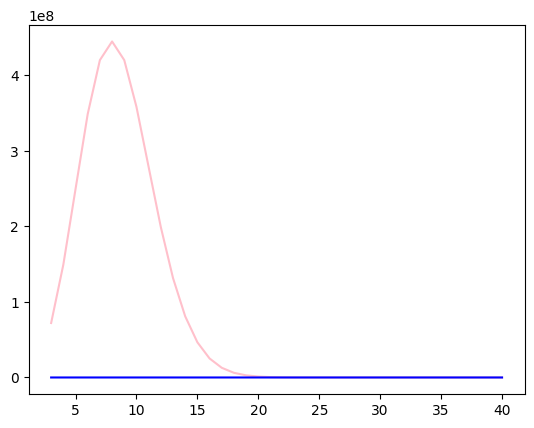

In [6]:
N=np.linspace(3,40,41,dtype=int)
Y=np.zeros(len(N))
Y1=np.zeros(len(N))
plt.figure()
contador=0
for n in N:
  Y[contador]=error(9,n)
  Y1[contador]=serie_expn(9,n)
  contador+=1
plt.plot(N,Y,color="pink")
plt.plot(N,Y1,color="blue")
plt.show()

In [7]:
def des_abs(x,N):
  comparar=abs(10e-7*serie_expn(x,N))
  absoluto=abs((-x)**(N+1)/factorial(N+1))
  #print(comparar-absoluto)
  #return absoluto <= comparar
  return comparar - absoluto


In [8]:
des_abs(3,100)

4.978706836786398e-08

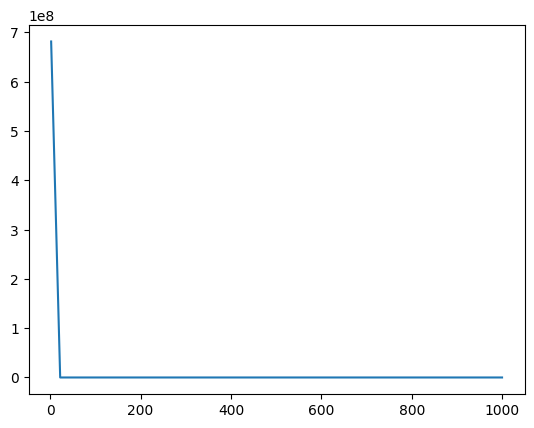

In [13]:
X=np.linspace(2,1000,dtype=int)
Y=np.zeros(len(X))
contador=0
for x in X:
  Y[contador]=des_abs(x,x-1)
plt.figure()
plt.plot(X,Y)
plt.show()

In [1]:
#e^-x es menos efectivo que 1/e^x
#veamos esta comparación
def exp_s(x,k):
  k=int(k)
  suma=0
  for i in range(k):
    suma+=(x**i)/factorial(i)
  return suma


In [20]:
def precision(x):
  xi=serie_expn(x,400)
  #serie para x negativos
  xd=1/exp_s(x,400)
  #dividiendo
  xr=exp(-x)
  #valor real
  valores={"Serie para negativos":xi,"1/serie exp":xd,"Valor real":xr}
  return dict(sorted(valores.items(), key=lambda item:item[1]))


In [21]:
precision(300)

{'Valor real': 5.148200222412013e-131,
 '1/serie exp': 5.148200336014878e-131,
 'Serie para negativos': 4.717980157146126e+121}

In [22]:
precision(57)

{'Serie para negativos': -33685507.89807121,
 'Valor real': 1.7587922024243116e-25,
 '1/serie exp': 1.7587922024243128e-25}

Así podemos ver que nos acercamos más, y tenemos un error menor cuando usamos 1/exp(x), que cuando usamos exp(-x) directamente


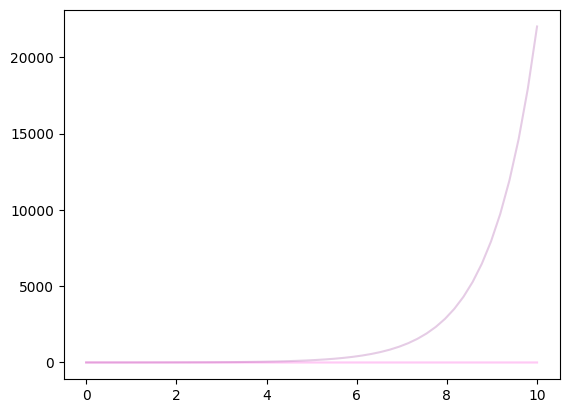

array([1.00000000e+00, 8.15395806e-01, 6.64870320e-01, 5.42132470e-01,
       4.42052542e-01, 3.60447789e-01, 2.93907615e-01, 2.39651036e-01,
       1.95410450e-01, 1.59336861e-01, 1.29922608e-01, 1.05938350e-01,
       8.63816861e-02, 7.04352645e-02, 5.74326193e-02, 4.68303169e-02,
       3.81852439e-02, 3.11360877e-02, 2.53882353e-02, 2.07014606e-02,
       1.68798841e-02, 1.37637867e-02, 1.12229340e-02, 9.15113329e-03,
       7.46179570e-03, 6.08431691e-03, 4.96112649e-03, 4.04528173e-03,
       3.29850576e-03, 2.68958776e-03, 2.19307858e-03, 1.78822707e-03,
       1.45811285e-03, 1.18893911e-03, 9.69455960e-04, 7.90490323e-04,
       6.44562494e-04, 5.25573554e-04, 4.28550471e-04, 3.49438257e-04,
       2.84930489e-04, 2.32331126e-04, 1.89441825e-04, 1.54470070e-04,
       1.25954247e-04, 1.02702565e-04, 8.37432404e-05, 6.82838870e-05,
       5.56783950e-05, 4.53999298e-05])

In [39]:
X=np.linspace(0,10)
Y1=np.zeros(len(X))
Y2=np.zeros(len(X))
Y3=np.zeros(len(X))
contador=0
for x in X:
  Y1[contador]=serie_expn(x,100)
  Y2[contador]=1/exp_s(x,100)
  Y3[contador]=exp(x)
  contador+=1
plt.figure()
plt.plot(X,Y1,c="magenta",alpha=0.2)
plt.plot(X,Y2,c="pink",alpha=0.2)
plt.plot(X,Y3,c="purple",alpha=0.2)
plt.show()

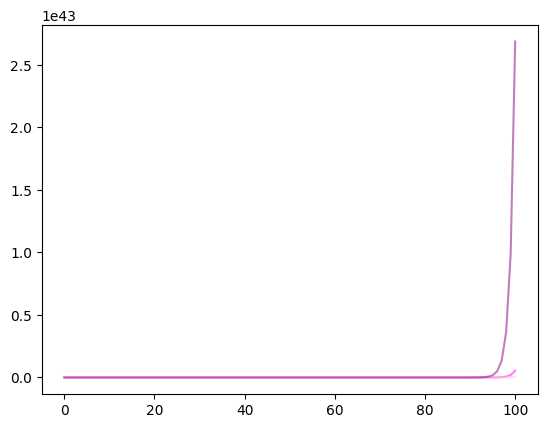

In [42]:
X=np.linspace(0,100,101)
Y1=np.zeros(len(X))
Y2=np.zeros(len(X))
Y3=np.zeros(len(X))
contador=0
for x in X:
  Y1[contador]=serie_expn(x,100)
  Y2[contador]=1/exp_s(x,100)
  Y3[contador]=exp(x)
  contador+=1
plt.figure()
plt.plot(X,Y1,c="magenta",alpha=0.5)
plt.plot(X,Y2,c="pink",alpha=0.5)
plt.plot(X,Y3,c="purple",alpha=0.5)
plt.show()

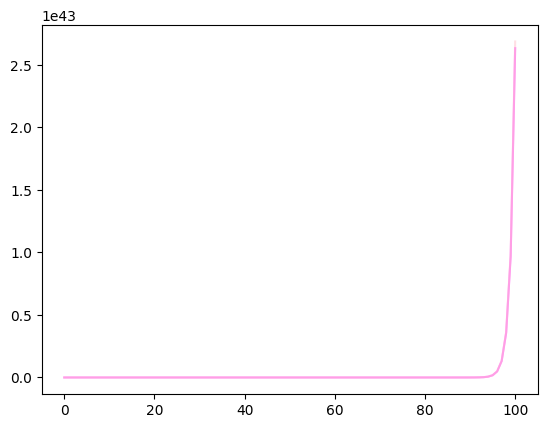

In [44]:
X=np.linspace(0,100,101)
Y1=np.zeros(len(X))
Y2=np.zeros(len(X))
contador=0
for x in X:
  Y1[contador]=abs(serie_expn(x,100)-exp(x))
  Y2[contador]=abs(exp(x)-1/exp_s(x,100))
  contador+=1
plt.figure()
plt.plot(X,Y1,c="magenta",alpha=0.5)
plt.plot(X,Y2,c="pink",alpha=0.5)
plt.show()